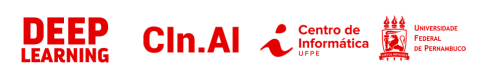

## Equipe:
* Carlos Medeiros (chvm@cin.ufpe.br)
* Danielle Alves (dkas@cin.ufpe.br)

In [1]:
!pip install openai

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
# Origem https://amazon-reviews-2023.github.io/main.html

df_meta = pd.read_json('./data/meta_Video_Games.jsonl.gz', lines=True)
df_review = pd.read_json('./data/Video_Games.jsonl.gz', lines=True)

In [ ]:
df_meta[df_meta['parent_asin'] == 'B0BN942894'].sort_values('rating_number', ascending=False)

In [4]:
df_headset = pd.read_csv('/content/headset2_dataset.csv')

In [5]:
df_headset

,Unnamed: 0,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,839,5,Perfect,Great,[],B01H6GUCCQ,B0BN942894,AEPS4PAETQFKIPROSTLJDHQJAVKA,2020-02-08 17:00:38.466,0,True
1,1050,5,Good sound quality,Kids loved them,[],B01H6GUCCQ,B0BN942894,AGODEE2NRFP5H2KRXIZPZPV5QSJQ,2019-12-12 00:25:56.284,0,True
2,1103,5,Five Stars,ok,[],B01H6GUCCQ,B0BN942894,AE6PR5M6PXGJLE6X2MXADNEARJEA,2018-04-15 21:59:53.424,0,True
3,1117,1,Cheaply made poor quality,Item received broken poor quality. Adjusting h...,[],B01H6GUCCQ,B0BN942894,AGVKX5U6MGF7BOQEM33QCOF2OCPA,2019-12-13 12:22:03.049,0,True
4,1229,5,Good deal!,If you're really into gaming I should have thi...,[],B01H6GUCCQ,B0BN942894,AG4SYRMRQHJOPBIGDNWIG65RUXHQ,2020-02-06 00:13:38.967,0,True
...,...,...,...,...,...,...,...,...,...,...,...
17305,4622982,5,These are awesome with my ps4,These are awesome with my ps4!! FYI: need a fe...,[],B01H6GUCCQ,B0BN942894,AHTN2M4GM5XTVGOZQ4CLFE4MBCXQ,2017-01-25 02:41:15.000,0,True
17306,4623083,4,Great mic but...,I love this headset it has great sound quality...,[],B081JP3MJK,B0BN942894,AEH4ROCCLPHFDCPYKYXVCA6SJSTQ,2020-04-23 00:31:12.841,0,False
17307,4623383,4,Four Stars,A little uncomfortable on the ears but still a...,[],B01H6GUCCQ,B0BN942894,AEIJQRBB3AM2PDE2XHVXKNDPM3RQ,2017-10-19 17:13:39.459,0,True
17308,4624493,5,Nice headset,Great headset,[],B01H6GUCCQ,B0BN942894,AH7AHKGUD6Q4BC5XVYMX7YME3AHQ,2020-08-20 20:27:12.881,0,True


# Análise de Frequências

In [6]:
# Distribuição por Nota
notes = df_headset.value_counts('rating')
notes = notes.reset_index()

fig = px.bar(
    notes.sort_values('rating'),
    x='rating',
    y='count',
    title='Frequência de Ratings do BENGOO Stereo Pro Gaming Headset for PS4',
    labels={'rating': 'Rating', 'count': 'Frequência'},
    text='count'
)

# Melhorar a aparência
fig.update_traces(marker_color='skyblue', textposition='outside')

# Exibir o gráfico
fig.show()

# Nuvem de Palavras

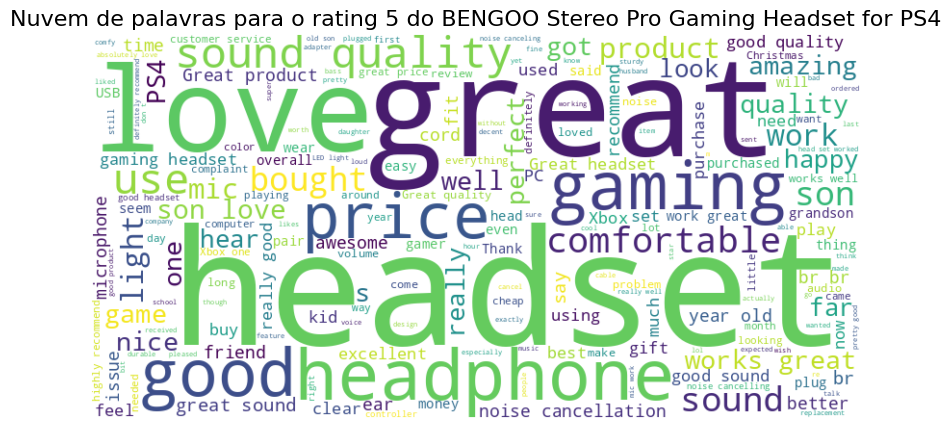

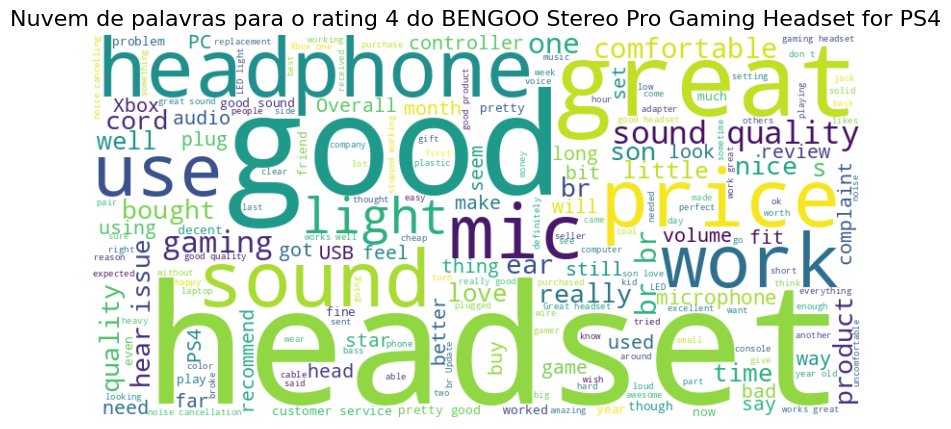

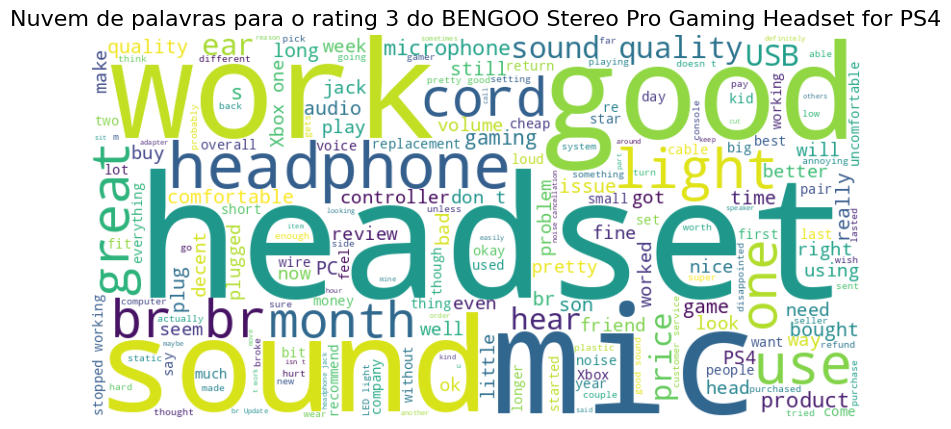

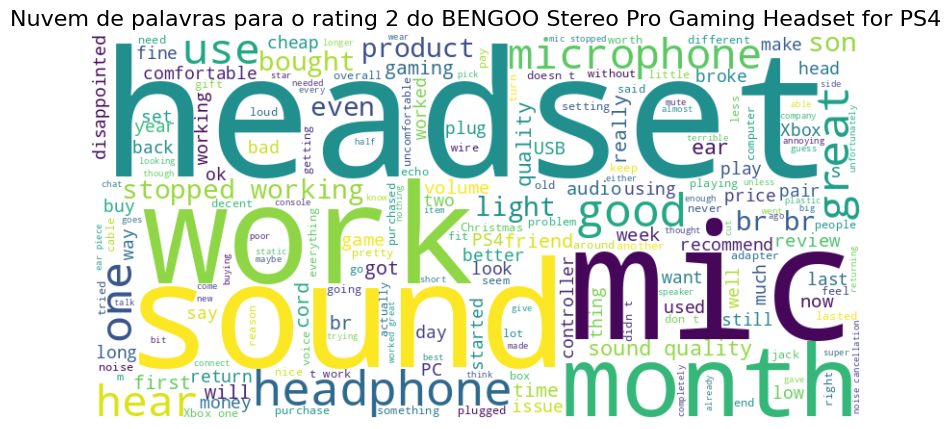

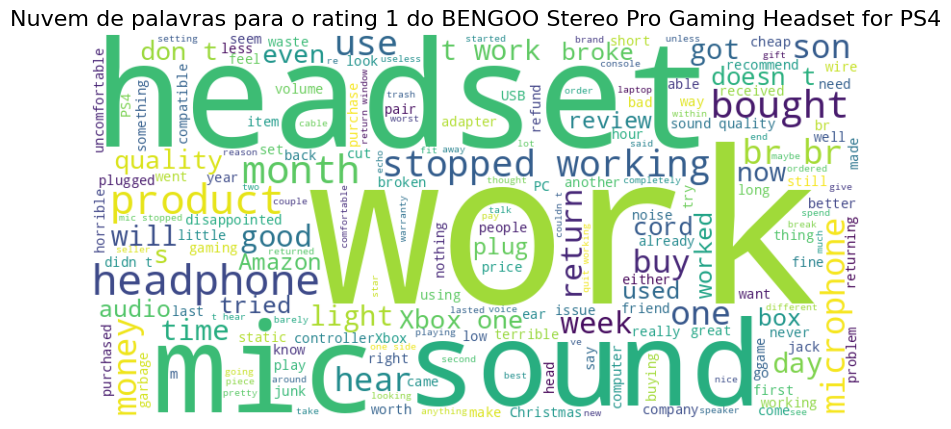

In [7]:
#Define os valores únicos de rating definindo do maior para o menor
unique_ratings = sorted(df_headset['rating'].unique(), reverse=True)

# Laço para plotar cada nuvem de palavras por único rating
for rating in unique_ratings:
    # Conccatenar todos os reviews (text)
    text_data = " ".join(df_headset[df_headset['rating'] == rating]['text'].dropna())

    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Plotar a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de palavras para o rating {rating} do BENGOO Stereo Pro Gaming Headset for PS4', fontsize=16)
    plt.show()


# Preparação do Dataset

In [8]:
# Deixando somente as colunas de rating e text (reviews)
df_final = df_headset.drop(columns=['Unnamed: 0','title', 'images', 'asin', 'parent_asin','user_id','timestamp','helpful_vote','verified_purchase'])

# Remoção dos valores nulos
df_final = df_final.dropna(subset=['text'])

df_final.shape

(17307, 2)

In [9]:
# Dividir os dados em treino e (validação + teste) (60/40)
train_data, temp_data = train_test_split(df_final, test_size=0.4, random_state=42, stratify=df_final['rating'])

# Dividir (validação + teste) em validação e teste
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['rating'])

# Exibir as dimensões dos conjuntos
print('Base de Treino', train_data.shape)
print('Base de Validação', val_data.shape)
print('Base de Teste', test_data.shape)

Base de Treino (10384, 2)
Base de Validação (3461, 2)
Base de Teste (3462, 2)


# SVM + BOW

In [ ]:
# Vectorizar os textos usando BoW
vectorizer_bow = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer_bow.fit_transform(train_data['text']).toarray()
X_val_bow = vectorizer_bow.transform(val_data['text']).toarray()

# Classes alvo
y_train = train_data['rating']
y_val = val_data['rating']

# Treinar o SVM com BoW
svm_bow = SVC(kernel='linear', random_state=42)
svm_bow.fit(X_train_bow, y_train)

# Predições
y_pred_train_bow = svm_bow.predict(X_train_bow)
y_pred_val_bow = svm_bow.predict(X_val_bow)

# Avaliação
accuracy_train_bow = accuracy_score(y_train, y_pred_train_bow)
accuracy_val_bow = accuracy_score(y_val, y_pred_val_bow)
f1_train_bow = f1_score(y_train, y_pred_train_bow, average='weighted')
f1_val_bow = f1_score(y_val, y_pred_val_bow, average='weighted')

print(f'Acc de Treino: {accuracy_train_bow} / F1 de Treino: {f1_train_bow}')
print(f'Acc de Validação: {accuracy_val_bow} / F1 de Validação: {f1_val_bow}')

Acc de Treino: 0.9072611710323575 / F1 de Treino: 0.8988819679690366
Acc de Validação: 0.7182895117018203 / F1 de Validação: 0.6905059901277857


In [ ]:
# Código para Teste
X_test_bow = vectorizer_bow.transform(test_data['text']).toarray()
y_test = test_data['rating']

y_pred_test_bow = svm_bow.predict(X_test_bow)

accuracy_test_bow = accuracy_score(y_test, y_pred_test_bow)
f1_test_bow = f1_score(y_test, y_pred_test_bow, average='weighted')

print(f'Acc de Teste: {accuracy_test_bow} / F1 de Teste: {f1_test_bow}')

Acc de Teste: 0.7192374350086655 / F1 de Teste: 0.6898353299137936


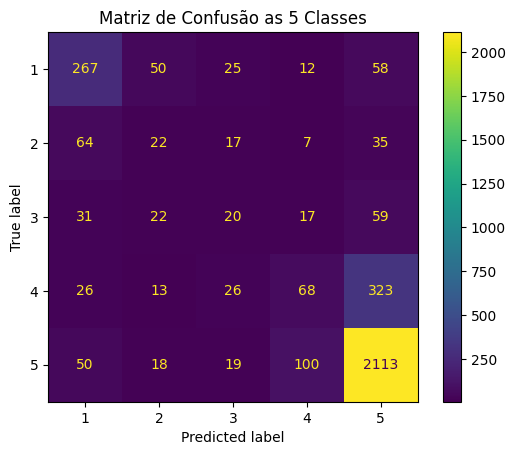

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_bow, labels=[1, 2, 3, 4, 5])

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='viridis', values_format='d', colorbar=True)
plt.title("Matriz de Confusão as 5 Classes")

plt.show()

# SVM + Embeddings

In [11]:
import gensim.downloader as api

# Baixar embeddings pré-treinados do GloVe (50 dimensões)
glove_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [12]:
palavra = 'computer'

if palavra in glove_model:
    vetor = glove_model[palavra]
    print(f"Vetor de embeddings para '{palavra}':")
    print(vetor)
else:
    print(f"A palavra '{palavra}' não está no vocabulário do modelo.")

Vetor de embeddings para 'computer':
[ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627   0.35146   0.25813  -0.55029   0.51056
  0.37409   0.12092  -1.6166    0.83653   0.14202  -0.52348   0.73453
  0.12207  -0.49079   0.32533   0.45306  -1.585    -0.63848  -1.0053
  0.10454  -0.42984   3.181    -0.62187   0.16819  -1.0139    0.064058
  0.57844  -0.4556    0.73783   0.37203  -0.57722   0.66441   0.055129
  0.037891  1.3275    0.30991   0.50697   1.2357    0.1274   -0.11434
  0.20709 ]


In [13]:
# Função para gerar representações médias de embeddings para textos
def text_to_embedding_gensim(texts, model, embedding_dim):
    embeddings = np.zeros((len(texts), embedding_dim))
    for i, text in enumerate(texts):
        words = text.split()
        word_embeddings = [model[word] for word in words if word in model]
        if word_embeddings:
            embeddings[i] = np.mean(word_embeddings, axis=0)
    return embeddings

# Gerar embeddings para treino e teste
embedding_dim = 50
X_train_emb = text_to_embedding_gensim(train_data['text'], glove_model, embedding_dim)
X_val_emb = text_to_embedding_gensim(val_data['text'], glove_model, embedding_dim)

# Treinar o SVM com embeddings
svm_emb = SVC(kernel='linear', random_state=42)
svm_emb.fit(X_train_emb, y_train)

# Predições
y_pred_train_emb = svm_emb.predict(X_train_emb)
y_pred_val_emb = svm_emb.predict(X_val_emb)

# Avaliação
accuracy_train_emb = accuracy_score(y_train, y_pred_train_emb)
accuracy_val_emb = accuracy_score(y_val, y_pred_val_emb)
f1_train_emb = f1_score(y_train, y_pred_train_emb, average='weighted')
f1_val_emb = f1_score(y_val, y_pred_val_emb, average='weighted')

print(f'Acc de Treino: {accuracy_train_emb} / F1 de Treino: {f1_train_emb}')
print(f'Acc de Validação: {accuracy_val_emb} / F1 de Validação: {f1_val_emb}')

Acc de Treino: 0.6816255778120185 / F1 de Treino: 0.5741437303620868
Acc de Validação: 0.6763941057497833 / F1 de Validação: 0.564478938781375


In [16]:
# Código para Teste
X_test_emb = text_to_embedding_gensim(test_data['text'], glove_model, embedding_dim)

y_pred_test_emb = svm_emb.predict(X_test_emb)

accuracy_test_emb = accuracy_score(y_test, y_pred_test_emb)
f1_test_emb = f1_score(y_test, y_pred_test_emb, average='weighted')

print(f'Acc de Teste: {accuracy_test_emb} / F1 de Teste: {f1_test_emb}')

Acc de Teste: 0.6782206816868862 / F1 de Teste: 0.5705858805964602


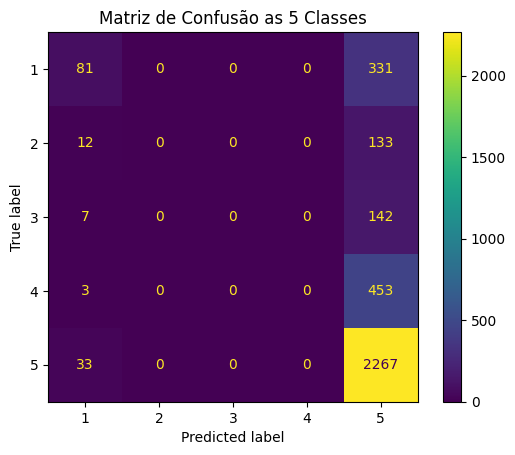

In [17]:
cm = confusion_matrix(y_test, y_pred_test_emb, labels=[1, 2, 3, 4, 5])

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='viridis', values_format='d', colorbar=True)
plt.title("Matriz de Confusão as 5 Classes")

plt.show()

# Word2Vec

In [ ]:
# Pré-processamento textual antes de treinar o modelo Word2Vec
import nltk
from nltk.tokenize import word_tokenize

# tokenizador de sentença do nltk
nltk.download('punkt_tab')

tokenized_sents = [word_tokenize(i) for i in df_final['text'].values]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Preparar os textos para o Word2Vec (tokenização simples)
texts = df_final['text'].apply(simple_preprocess).tolist()

# Treinar o modelo Word2Vec
word2vec_model = Word2Vec(tokenized_sents, vector_size=50, window=5, min_count=2, workers=4, sg=0, epochs=10)

# Salvar informações do modelo Word2Vec
vocab_size = len(word2vec_model.wv.index_to_key)

vocab_size

6484

In [ ]:
# Função para calcular a média dos vetores das palavras em um texto
def text_to_embedding(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Gerar embeddings para todos os textos
embeddings = np.array([text_to_embedding(text, word2vec_model) for text in texts])

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, df_final['rating'], test_size=0.2, random_state=42, stratify=df_final['rating'])

# Treinar o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_train_w2 = svm_model.predict(X_train)
y_pred_test_w2 = svm_emb.predict(X_test)

# Avaliação
accuracy_train_w2 = accuracy_score(y_train, y_pred_train_w2)
accuracy_test_w2 = accuracy_score(y_test, y_pred_test_w2)
f1_train_w2 = f1_score(y_train, y_pred_train_w2, average='weighted')
f1_test_w2 = f1_score(y_test, y_pred_test_w2, average='weighted')

print(f'Acc de Treino: {accuracy_train_w2} / F1 de Treino: {f1_train_w2}')
print(f'Acc de Validação: {accuracy_test_w2} / F1 de Validação: {f1_test_w2}')

Acc de Treino: 0.7294330083062477 / F1 de Treino: 0.6416623841676069
Acc de Validação: 0.463893703061814 / F1 de Validação: 0.47255259196599336


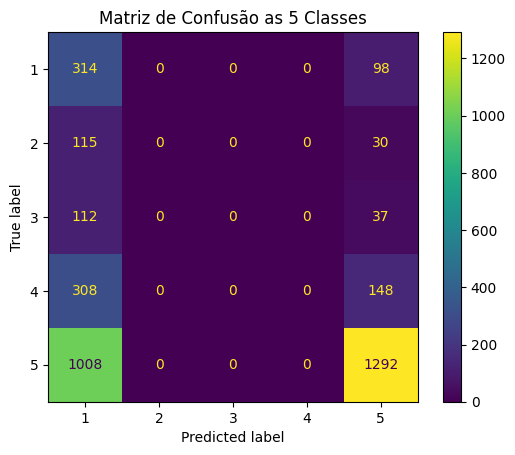

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_w2, labels=[1, 2, 3, 4, 5])

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='viridis', values_format='d', colorbar=True)
plt.title("Matriz de Confusão as 5 Classes")

plt.show()

# BERT

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch 1:
  Train Loss: 0.7046
  Train Acc: 0.7829, Train F1: 0.7129
  Validation Acc: 0.7651, Validation F1: 0.6944
Epoch 2:
  Train Loss: 0.5666
  Train Acc: 0.8362, Train F1: 0.8103
  Validation Acc: 0.7665, Validation F1: 0.7425
Epoch 3:
  Train Loss: 0.4758
  Train Acc: 0.8738, Train F1: 0.8596
  Validation Acc: 0.7741, Validation F1: 0.7504
Epoch 4:
  Train Loss: 0.3980
  Train Acc: 0.8942, Train F1: 0.8834
  Validation Acc: 0.7634, Validation F1: 0.7357
Epoch 5:
  Train Loss: 0.3212
  Train Acc: 0.9328, Train F1: 0.9315
  Validation Acc: 0.7183, Validation F1: 0.7278
Epoch 6:
  Train Loss: 0.2550
  Train Acc: 0.9446, Train F1: 0.9422
  Validation Acc: 0.7417, Validation F1: 0.7319
Epoch 7:
  Train Loss: 0.1946
  Train Acc: 0.9630, Train F1: 0.9621
  Validation Acc: 0.7420, Validation F1: 0.7215
Epoch 8:
  Train Loss: 0.1556
  Train Acc: 0.9678, Train F1: 0.9668
  Validation Acc: 0.7524, Validation F1: 0.7318
Epoch 9:
  Train Loss: 0.1275
  Train Acc: 0.9724, Train F1: 0.9723
  Va

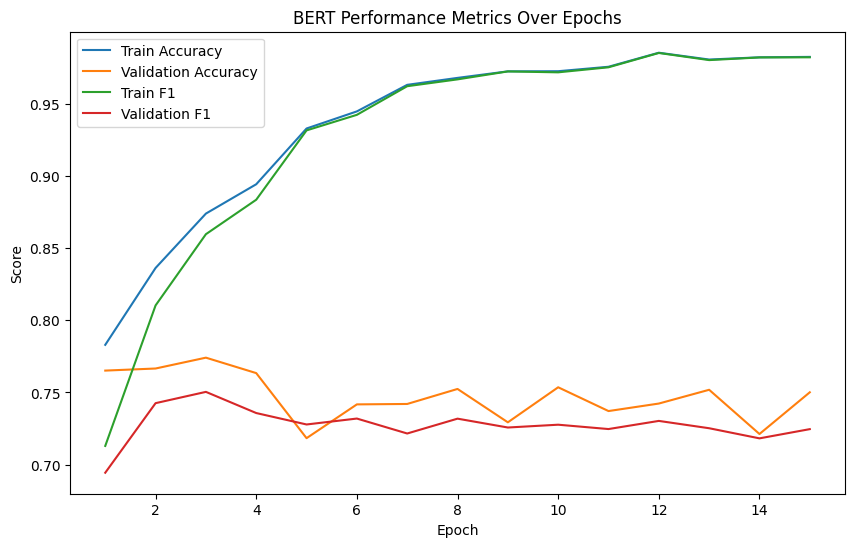

In [18]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Configurações gerais
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 15
LEARNING_RATE = 5e-5
NUM_LABELS = len(train_data['rating'].unique())  # Número de classes

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Dataset personalizado
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding="max_length",
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Normalizar os rótulos para começar em 0
label_min = train_data['rating'].min()
train_data['rating'] = train_data['rating'] - label_min
val_data['rating'] = val_data['rating'] - label_min

# Criar DataLoaders
train_dataset = TextDataset(train_data['text'], train_data['rating'], tokenizer, MAX_LEN)
val_dataset = TextDataset(val_data['text'], val_data['rating'], tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Modelo
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS)
model = model.to(DEVICE)

# Otimizador
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# Função de treinamento
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return total_loss / len(data_loader)

# Função de avaliação
def evaluate(model, data_loader, device):
    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            targets.extend(labels.cpu().numpy())
    return accuracy_score(targets, preds), f1_score(targets, preds, average='weighted')

# Loop de treinamento e avaliação
train_accuracies, val_accuracies = [], []
train_f1s, val_f1s = [], []

for epoch in range(EPOCHS):
    train_loss = train_epoch(model, train_loader, optimizer, DEVICE)
    train_acc, train_f1 = evaluate(model, train_loader, DEVICE)
    val_acc, val_f1 = evaluate(model, val_loader, DEVICE)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)

    print(f"Epoch {epoch + 1}:")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}")
    print(f"  Validation Acc: {val_acc:.4f}, Validation F1: {val_f1:.4f}")

# Gráfico de comparação
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, EPOCHS + 1), train_f1s, label='Train F1')
plt.plot(range(1, EPOCHS + 1), val_f1s, label='Validation F1')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("BERT Performance Metrics Over Epochs")
plt.legend()
plt.show()

# in-context learning

In [ ]:
import openai

# Configuração da API OpenAI
openai.api_key = "coloque a sua key"

# Função para usar In-Context Learning com o modelo da OpenAI
def classify_review(text):
    # Construção do prompt
    system_prompt = "You are an AI that classifies reviews with ratings from 1 to 5 based on the provided text."
    examples = """
Here are some examples:
- Text: "The item arrived broken, very poor quality." | Rating: 1
- Text: "Great product, fast delivery, very satisfied!" | Rating: 5
- Text: "Average quality, but it works." | Rating: 3
"""
    user_prompt = f"Classify the following review:\nText: \"{text}\"\nRating:"

    # Chamada à API com o formato de Chat
    response = openai.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": examples + user_prompt}
        ],
        temperature=0  # Para maior consistência
    )
    # Extrai o rating da resposta
    return response.choices[0].message.content.strip()

# Testando a função em uma amostra do dataset
sample_text = df_final.iloc[17304]['text']
predicted_rating = classify_review(sample_text)

print(f"Texto: {sample_text}")
print(f"Rating Predito: {predicted_rating}")


Texto: A little uncomfortable on the ears but still a good product.
Rating Predito: 4


In [ ]:
# Testando a função em uma amostra do dataset
sample_text = df_final.iloc[3]['text']
predicted_rating = classify_review(sample_text)

print(f"Texto: {sample_text}")
print(f"Rating Predito: {predicted_rating}")

Texto: Item received broken poor quality. Adjusting headband cheaply made. Seller asked me to change my review, in exchange for a Possible refund of 40.00. Feedback extortion? Wow. Amazon lets anyone sell here. Marketplace is getting really low class. If you don’t like honest reviews go sell somewhere else.
Rating Predito: 1


In [ ]:
df_final

,rating,text
0,5,Great
1,5,Kids loved them
2,5,ok
3,1,Item received broken poor quality. Adjusting h...
4,5,If you're really into gaming I should have thi...
...,...,...
17305,5,These are awesome with my ps4!! FYI: need a fe...
17306,4,I love this headset it has great sound quality...
17307,4,A little uncomfortable on the ears but still a...
17308,5,Great headset
